# **TERCER ENTREGA DEL PROYECTO FINAL**


---





> ### **Presentación de la empresa, organización o problema específico.**


Si bien el dataset no se trata de una empresa específica, el problema detallado no es ajeno a ninguna companía.


El problema específico del que hablamos es la **Deserción Laboral** (en inglés: Employee Attrition).


La deserción laboral se refiere a cuando los empleados abandonan voluntariamente la empresa en la cual trabajan, dejando un puesto desocupado. Esta deserción provoca que una empresa experimente una disminución de su fuerza laboral y por ende, que el logro de sus objetivos organizacionales pueda verse afectado.


Evidentemente mientras más altos sean los porcentajes de deserción laboral mayores serán los problemas que se originarán en una organización. Elevadas tasas de deserción laboral pueden poner en entredicho la reputación de la empresa y hacerse menos laboral a los ojos de futuros candidatos. Pero también, los clientes pueden cuestionarse con respecto a la seriedad de la empresa debido al constante cambio de personal y la calidad del servicio ofrecido a los clientes puede verse comprometida debido a la misma razón.


En conclusión, la deserción laboral puede ser más perjudicial de lo que imaginaba y con elevadas repercusiones económicas.


> ### **Preguntas y objetivos de la investigación.**

El objetivo es conocer las principales causas de deserción e implementar estrategias de gestión adecuadas al respecto.

> ### **Conformación del equipo de trabajo.**

El equipo de trabajo está conformado por Facundo Cortez, Claudio Gabriel Di Giacomo, Erica Lehmann.

> ### **Indicación de la fuente del dataset y los criterios de selección (Data Acquisition).**

El dataset fue obtenido a través de Kaggle, una comunidad online de data scientists y practicantes de machine learning. 

Luego de buscar varios Dataset sobre la temática, decidimos trabajar con “Employee Attrition” de Prashant Patel.

Analizando, y comparando el dataset con otros, vemos que la cantidad de datos y los detalles de las columnas servían para hacer un exhaustivo análisis, ya que tenemos datos como viajes laborales, distancia entre el hogar y el empleo, participación laboral, aumento salarial, antigüedad laboral, etc.

El link para encontrar el dataset es: https://www.kaggle.com/patelprashant/employee-attrition

> ### **Análisis de componentes principales.**

El dataset está compuesto por 1470 filas y 35 columnas. A continuación el detalle adicional de ciertas columnas para mayor comprensión (si bien el dataset originalmente está en inglés, posteriormente en la etapa de Data Wrangling se eliminarán las columnas que se consideren innecesarias para análisis y se traducirán los datos al español para un análisis más comprensivo):

1.   **Attrition:** Deserción Laboral. Funcionará como nuestra variable Target.
2.   **EmployeeNumber:** Es el número único que se ha asignado a cada empleado.
3.   **Hourly Rate:** Salario por hora trabajada.
4.   **JobLevel:** Los niveles de trabajo, también conocidos como grados y clasificaciones de trabajo, establecen el nivel de responsabilidad y las expectativas de los roles en su organización. Pueden definirse mejor por impacto, antigüedad, conocimiento, habilidades o título de trabajo, y a menudo se asocian con una banda salarial.
5.   **StockOptionLevel:** Las opciones sobre acciones para empleados, también conocidas como ESO (Employee stock options) son otorgadas por un empleador a ciertos empleados. Por lo general, se otorgan a quienes ocupan puestos gerenciales o de nivel oficial. Las opciones sobre acciones otorgan al empleado el derecho a comprar una cierta cantidad de acciones a un precio específico, durante un período de tiempo acordado.
6.   **Education:** 1-Menor a universitario, 2-Universitario sin terminar, 3-Graduado Universitario, 4-Master, 5-Doctorado
7.   **EnvironmentSatisfaction:** 1-Bajo, 2-Medio, 3-Alto, 4-Muy Alto
8.   **JobInvolvement:** 1-Bajo, 2-Medio, 3-Alto, 4-Muy Alto
9.   **JobSatisfaction:** 1-Bajo, 2-Medio, 3-Alto, 4-Muy Alto
10.  **PerformanceRating:** 1-Bajo, 2-Bueno, 3-Excelente, 4-Sobresaliente
11.  **RelationshipSatisfaction:** 1-Bajo, 2-Medio, 3-Alto, 4-Muy Alto
12.  **WorkLifeBalance:** 1-Malo, 2-Bueno, 3-Muy Bueno, 4-Excelente
---




In [1]:
#importa las librerias
import pandas as pd
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

In [2]:
#parametros de visualizacion
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.labelcolor'] = 'grey'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#trae el dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/HR-Employee-Attrition.csv')
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


---
##**Data Wrangling**

In [5]:
#Traduce el Dataset
df.columns = ['Edad', 'Desercion', 'Viajes_Laborales', 'Tarifa_Diaria', 'Departamento', 'Distancia_Casa', 'Educacion', 'Carrera', 
              'Cantidad_Empleados', 'ID_Empleado', 'Satisfaccion_Ambiente', 'Genero', 'Tarifa_Hora', 'Participacion_Laboral', 'Nivel_Laboral', 
              'Puesto', 'Satisfaccion_Laboral', 'Estado_Civil', 'Ingresos_Mensuales', 'Tarifa_Mensual', 'Cant_Empresas_Trabajadas', 
              'Mayor_18', 'Horas_Extra', 'Aumento_Salario_Porcentual', 'Clasificacion_Rendimiento', 'Satisfaccion_Relacion', 
              'Horas_Habituales', 'Nivel_Opciones_Acciones', 'Antiguedad_Laboral_Personal', 'Cantidad_Capacitaciones_Anuales', 'Equilibrio_Laboral_Personal',
              'Antiguedad_Compania', 'Antiguedad_Puesto', 'Tiempo_Ultimo_Ascenso', 'Tiempo_Jefe_Actual']

df.Desercion = df.Desercion.replace({'Yes':'Si'})
df.Viajes_Laborales = df.Viajes_Laborales.replace({'Travel_Rarely':'Raramente', 'Travel_Frequently':'Frecuentemente','Non-Travel':'Nunca'})
df.Departamento = df.Departamento.replace({'Research & Development':'Investigacion y Desarrollo', 'Sales':'Ventas','Human Resources':'Recursos Humanos'})
df.Carrera = df.Carrera.replace({'Life Sciences':'Ciencias Naturales', 'Medical':'Medicina','Technical Degree':'Posgrado Tecnico', 'Other': 'Otros', 'Human Resources':'Recursos Humanos'})
df.Genero = df.Genero.replace({'Male':'Masculino', 'Female':'Femenino'})

df.Puesto = df.Puesto.replace({'Sales Executive':'Ejecutivo de Ventas', 'Research Scientist':'Investigador Cientifico', 'Laboratory Technician':'Tecnico de Laboratorio',
                               'Manufacturing Director':'Director de Manufactura','Healthcare Representative':'Representante de Atencion Medica','Manager':'Gerente',
                               'Sales Representative':'Representante de Ventas','Research Director':'Director de Investigaciones','Human Resources':'Recursos Humanos'})

df.Estado_Civil = df.Estado_Civil.replace({'Married':'Casado', 'Single':'Soltero', 'Divorced':'Divorciado'})
df.Horas_Extra = df.Horas_Extra.replace({'Yes':'Si'})


In [6]:
#Elimina las columnas innecesarias
df.drop(['Mayor_18'], axis = 'columns', inplace=True)

---
## **EDA**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Edad                             1470 non-null   int64 
 1   Desercion                        1470 non-null   object
 2   Viajes_Laborales                 1470 non-null   object
 3   Tarifa_Diaria                    1470 non-null   int64 
 4   Departamento                     1470 non-null   object
 5   Distancia_Casa                   1470 non-null   int64 
 6   Educacion                        1470 non-null   int64 
 7   Carrera                          1470 non-null   object
 8   Cantidad_Empleados               1470 non-null   int64 
 9   ID_Empleado                      1470 non-null   int64 
 10  Satisfaccion_Ambiente            1470 non-null   int64 
 11  Genero                           1470 non-null   object
 12  Tarifa_Hora                      1

In [8]:
df.shape

(1470, 34)

In [9]:
df.count()

Edad                               1470
Desercion                          1470
Viajes_Laborales                   1470
Tarifa_Diaria                      1470
Departamento                       1470
Distancia_Casa                     1470
Educacion                          1470
Carrera                            1470
Cantidad_Empleados                 1470
ID_Empleado                        1470
Satisfaccion_Ambiente              1470
Genero                             1470
Tarifa_Hora                        1470
Participacion_Laboral              1470
Nivel_Laboral                      1470
Puesto                             1470
Satisfaccion_Laboral               1470
Estado_Civil                       1470
Ingresos_Mensuales                 1470
Tarifa_Mensual                     1470
Cant_Empresas_Trabajadas           1470
Horas_Extra                        1470
Aumento_Salario_Porcentual         1470
Clasificacion_Rendimiento          1470
Satisfaccion_Relacion              1470


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Edad,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
Tarifa_Diaria,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
Distancia_Casa,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Educacion,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
Cantidad_Empleados,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
ID_Empleado,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
Satisfaccion_Ambiente,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
Tarifa_Hora,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
Participacion_Laboral,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
Nivel_Laboral,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


 El dataset (luego de una limpieza) posee 1470 filas y 34 columnas. No posee valores nulos.
 Veamos las correlaciones a través de un heatmap:

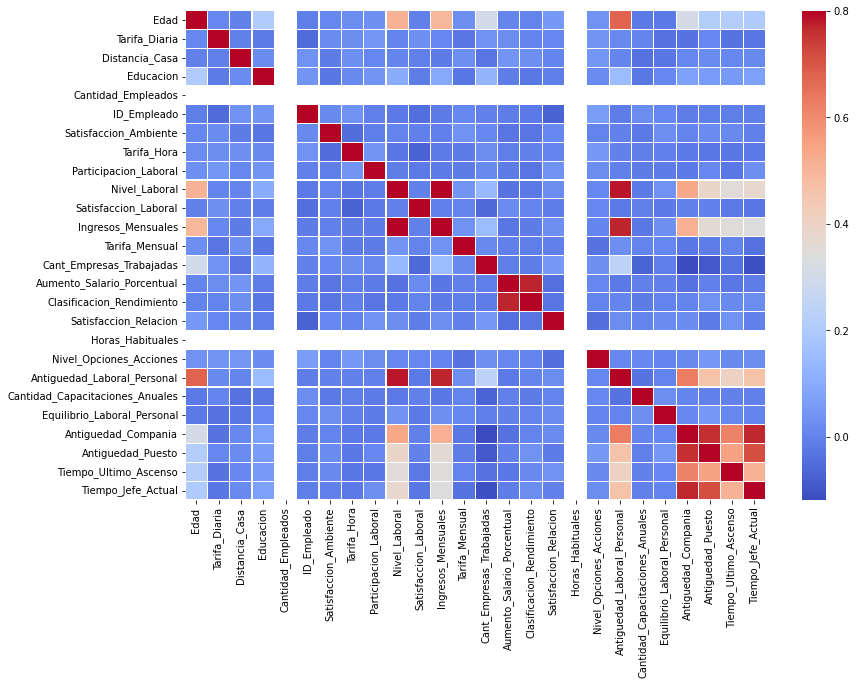

In [11]:
#heatmap
plt.figure(figsize=(13,9))
sns.heatmap(df.corr(),vmax=0.8,linewidth=0.1,cmap='coolwarm')
plt.show()

* Nivel_Laboral parece una característica importante que posee varias correlaciones. 
Lo verificaremos mas adelante.
* Antiguedad_Total_Laboral tiene una correlacion fuerte con Nivel_Laboral e Ingresos_Mensuales
* Un poco de correlacion fuerte se puede ver entre Antiguedad_Compania, Antiguedad_Puesto y Tiempo_Jefe_Actual.

## **Analisis Univariado, Bivariado, y Multivariado**

### **Características categóricas:**

In [12]:
categoricas = df.select_dtypes(include=[np.object]).columns   #selecciona todas las columnas del dataset cuyo dtype sea object
print("El total de caracteristicas categoricas es:",len(categoricas))

El total de caracteristicas categoricas es: 8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [13]:
df[categoricas].head()

,Desercion,Viajes_Laborales,Departamento,Carrera,Genero,Puesto,Estado_Civil,Horas_Extra
0,Si,Raramente,Ventas,Ciencias Naturales,Femenino,Ejecutivo de Ventas,Soltero,Si
1,No,Frecuentemente,Investigacion y Desarrollo,Ciencias Naturales,Masculino,Investigador Cientifico,Casado,No
2,Si,Raramente,Investigacion y Desarrollo,Otros,Masculino,Tecnico de Laboratorio,Soltero,Si
3,No,Frecuentemente,Investigacion y Desarrollo,Ciencias Naturales,Femenino,Investigador Cientifico,Casado,Si
4,No,Raramente,Investigacion y Desarrollo,Medicina,Masculino,Tecnico de Laboratorio,Casado,No


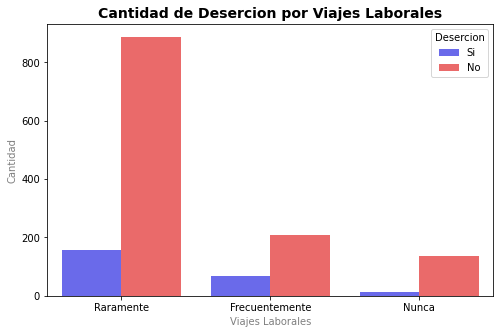

In [14]:
#Viajes Laborales v Desercion
fig,axes = plt.subplots(figsize = (8,5))
ax = sns.countplot(x='Viajes_Laborales',hue='Desercion', data=df, palette='seismic')
ax.set(title="Cantidad de Desercion por Viajes Laborales", xlabel="Viajes Laborales", ylabel="Cantidad")
plt.show()

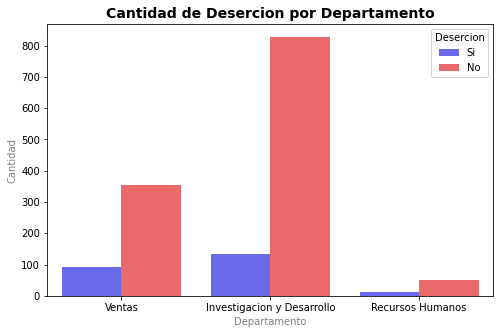

In [15]:
#Departamento v Desercion
fig,axes = plt.subplots(figsize = (8,5))
ax = sns.countplot(x='Departamento',hue='Desercion', data=df, palette='seismic')
ax.set(title="Cantidad de Desercion por Departamento", xlabel="Departamento", ylabel="Cantidad")
plt.show()

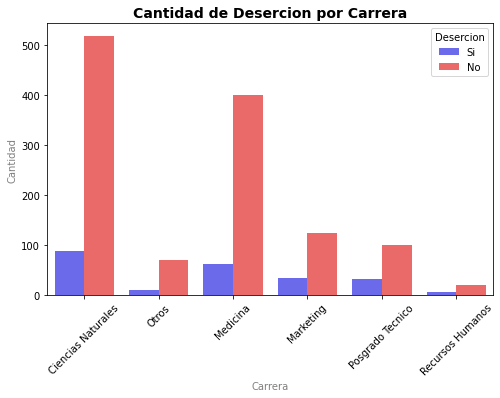

In [16]:
#Carrera v Desercion
fig,axes = plt.subplots(figsize = (8,5))
ax = sns.countplot(x='Carrera',hue='Desercion', data=df, palette='seismic')
ax.set(title="Cantidad de Desercion por Carrera", xlabel="Carrera", ylabel="Cantidad")
plt.xticks(rotation=45)
plt.show()

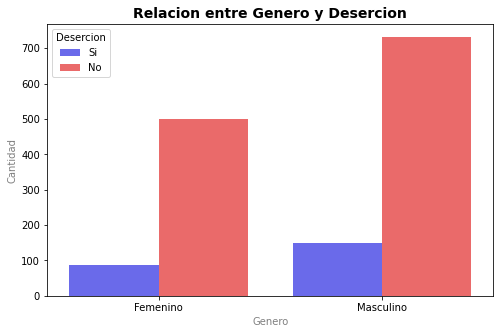

In [17]:
#Genero v Desercion
fig,axes = plt.subplots(figsize = (8,5))
ax = sns.countplot(x='Genero',hue='Desercion', data=df, palette='seismic')
ax.set(title="Relacion entre Genero y Desercion", xlabel="Genero", ylabel="Cantidad")
plt.show()

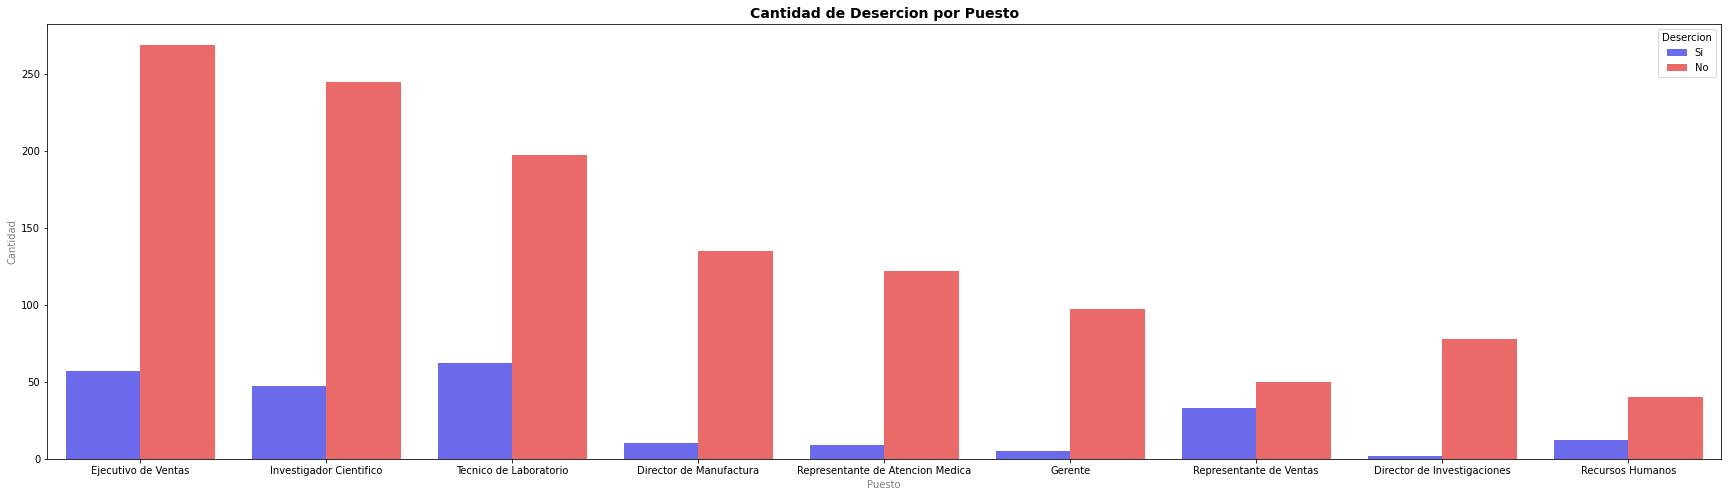

In [18]:
#Puesto v Desercion
fig,axes = plt.subplots(figsize = (30,8))
ax = sns.countplot(x='Puesto',hue='Desercion', data=df, palette='seismic')
ax.set(title="Cantidad de Desercion por Puesto", xlabel="Puesto", ylabel="Cantidad")
plt.show()

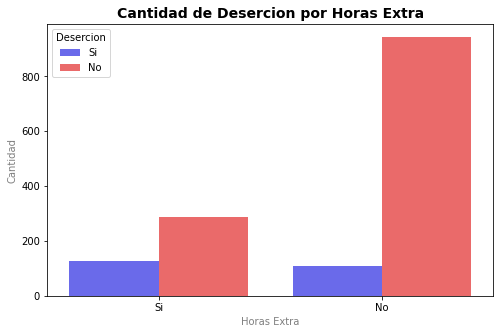

In [19]:
#Horas Extra v Desercion
fig,axes = plt.subplots(figsize = (8,5))
ax = sns.countplot(x='Horas_Extra',hue='Desercion', data=df, palette='seismic')
ax.set(title="Cantidad de Desercion por Horas Extra", xlabel="Horas Extra", ylabel="Cantidad")
plt.show()

In [20]:
#Cuantos hombres y mujeres hacen horas extras
pd.crosstab(df['Horas_Extra'], df['Genero'])

Genero,Femenino,Masculino
Horas_Extra,,
No,408,646
Si,180,236


#### Conclusiones:


*   La mayoría de los empleados viajan raramente, y el nivel de deserción de dichos empleados es mayor. 
*   La mayor cantidad de los empleados trabajan en Investigación y Desarrollo, pero los empleados del Departamento de Ventas (particularmete los representantes de ventas) tienen una mayor tendencia a dejar el trabajo.
*   Los empleados masculinos son mas propensos a hacer horas extras y tienen mayor deserción que las mujeres.

### **Características numericas:**

In [21]:
numericas = df.select_dtypes(include=[np.int64]).columns #selecciona todas las columnas del dataset cuyo dtype sea int64
print("El total de caracteristicas numericas es:", len(numericas))

El total de caracteristicas numericas es: 26


In [22]:
df[numericas].head()

,Edad,Tarifa_Diaria,Distancia_Casa,Educacion,Cantidad_Empleados,ID_Empleado,Satisfaccion_Ambiente,Tarifa_Hora,Participacion_Laboral,Nivel_Laboral,Satisfaccion_Laboral,Ingresos_Mensuales,Tarifa_Mensual,Cant_Empresas_Trabajadas,Aumento_Salario_Porcentual,Clasificacion_Rendimiento,Satisfaccion_Relacion,Horas_Habituales,Nivel_Opciones_Acciones,Antiguedad_Laboral_Personal,Cantidad_Capacitaciones_Anuales,Equilibrio_Laboral_Personal,Antiguedad_Compania,Antiguedad_Puesto,Tiempo_Ultimo_Ascenso,Tiempo_Jefe_Actual
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


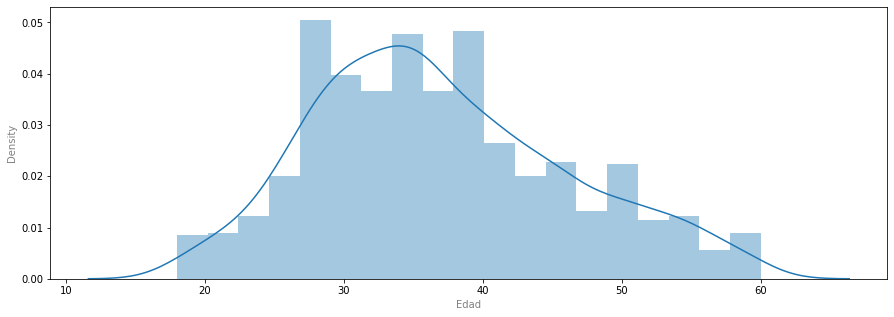

In [23]:
# Distribucion de Edad
fig,axes = plt.subplots(figsize = (15,5))
ax = sns.distplot(df['Edad'])
plt.show()

Veamos en primer lugar, un análisis de los datos numericos que son calificativos:

In [24]:
#Educacion
df['Educacion'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Educacion, dtype: int64

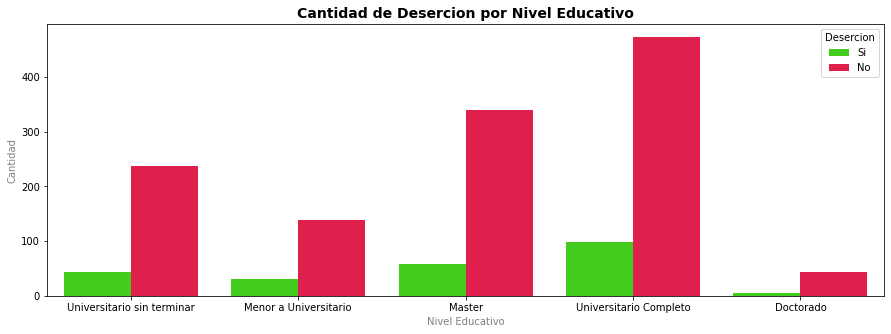

In [25]:
edu_map = {1 :'Menor a Universitario', 2: 'Universitario sin terminar', 3 :'Universitario Completo', 4 :'Master', 5: 'Doctorado'} #definicion textual de los niveles educativos.
fig,axes = plt.subplots(figsize = (15,5))
ax = sns.countplot(x=df['Educacion'].map(edu_map), hue='Desercion', data=df, palette='prism')
ax.set(title="Cantidad de Desercion por Nivel Educativo", xlabel="Nivel Educativo", ylabel="Cantidad")
plt.show()


In [26]:
#Satisfaccion Ambiente Laboral
df['Satisfaccion_Ambiente'].value_counts()

3    453
4    446
2    287
1    284
Name: Satisfaccion_Ambiente, dtype: int64

In [27]:
#Participacion Laboral
df['Participacion_Laboral'].value_counts()

3    868
2    375
4    144
1     83
Name: Participacion_Laboral, dtype: int64

#### Conclusiones:

* Los empleados en promedio tienen entre 25 y 40 años.   
* La mayoría de los empleados se recibieron en alguna carrera universitaria, seguidos por el nivel educativo "Master". La deserción en los que finalizaron la universidad es mayor, posiblemente porque poseen una mayor expectativa para con la empresa.
*  La Satisfaccion por el Ambiente Laboral puede ser calificada como alta o media, lo que significa que son muy pocos los empleados a quienes no les gusta el ambiente laboral por lo cual no podría considerarse una causa de deserción.
*  De la misma manera, la participacion laboral es bastante alta.

Continuemos con un análisis de caracteristicas numericas exactas:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


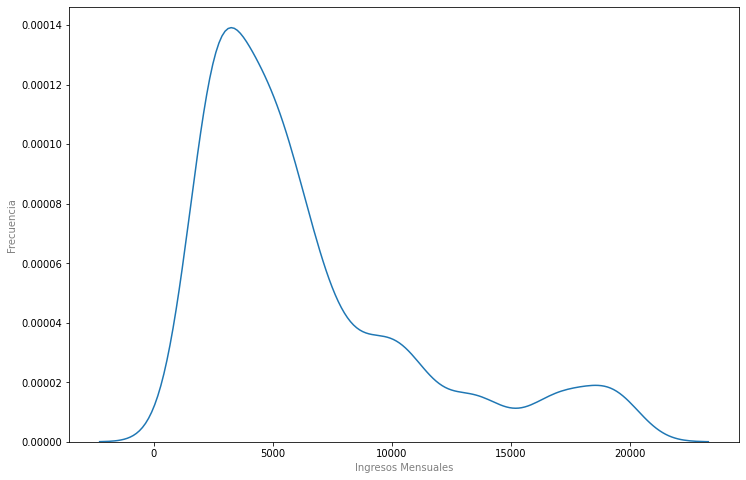

In [28]:
# Ingresos Mensuales
fig,axes = plt.subplots(figsize = (12,8))
ax = sns.distplot(df['Ingresos_Mensuales'],hist=False)
ax.set(xlabel="Ingresos Mensuales", ylabel="Frecuencia")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 0, 'Ingresos Mensuales')]

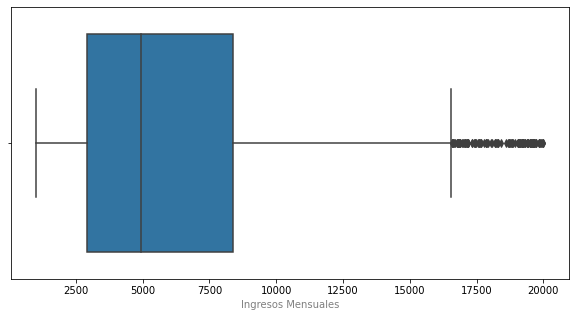

In [29]:
#Boxplot de ingresos mensuales
fig,axes = plt.subplots(figsize = (10,5))
ax = sns.boxplot(df['Ingresos_Mensuales'])
ax.set(xlabel="Ingresos Mensuales")

In [30]:
#Cantidad de empleados agrupados por edad
empleadoEdad = df.groupby('Edad')['Cantidad_Empleados'].sum().sort_values(ascending=False)
empleadoEdad.head()

Edad
35    78
34    77
36    69
31    69
29    68
Name: Cantidad_Empleados, dtype: int64

In [31]:
#Nivel Laboral
df['Nivel_Laboral'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: Nivel_Laboral, dtype: int64

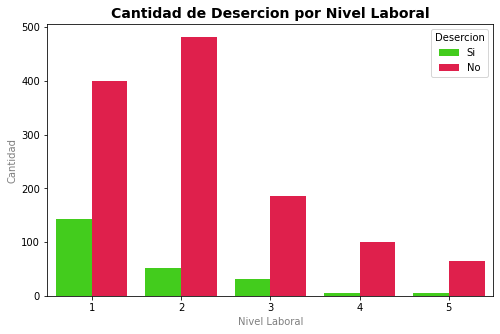

In [32]:
#Nivel Laboral v Desercion
fig,axes = plt.subplots(figsize = (8,5))
ax = sns.countplot(x='Nivel_Laboral',hue='Desercion', data=df,palette='prism')
ax.set(title="Cantidad de Desercion por Nivel Laboral", xlabel="Nivel Laboral", ylabel="Cantidad")
plt.show()

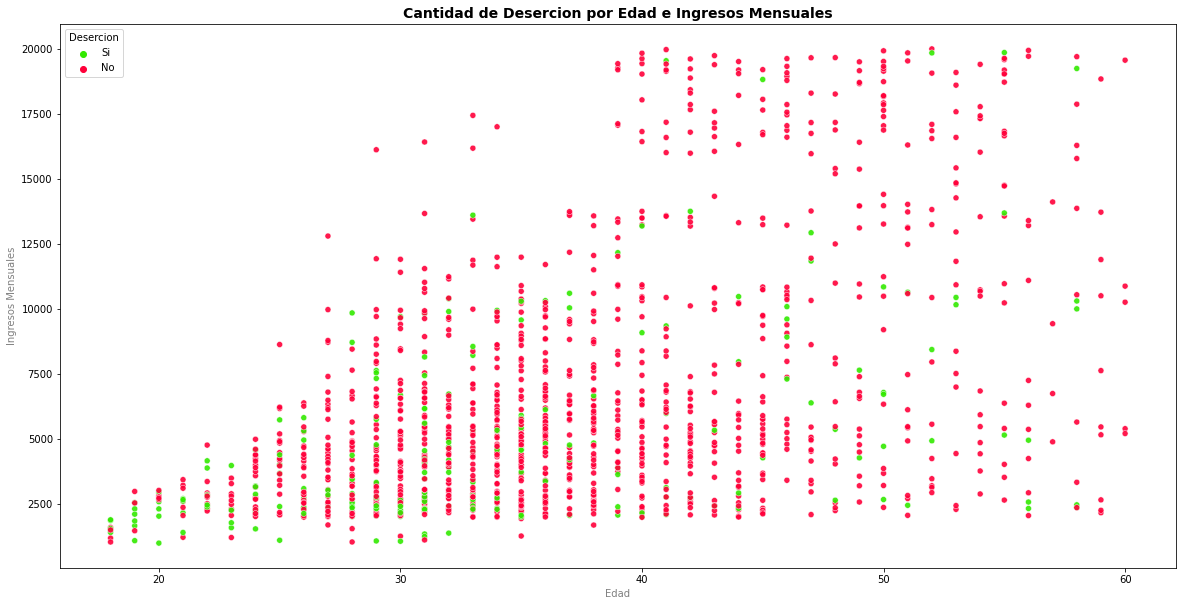

In [33]:
#Ingresos v Edad v Desercion
fig,axes = plt.subplots(figsize = (20,10))
ax = sns.scatterplot(x='Edad',y='Ingresos_Mensuales',hue='Desercion', data=df,palette='prism', alpha=0.9)
ax.set(title="Cantidad de Desercion por Edad e Ingresos Mensuales", xlabel="Edad", ylabel="Ingresos Mensuales")
plt.show()

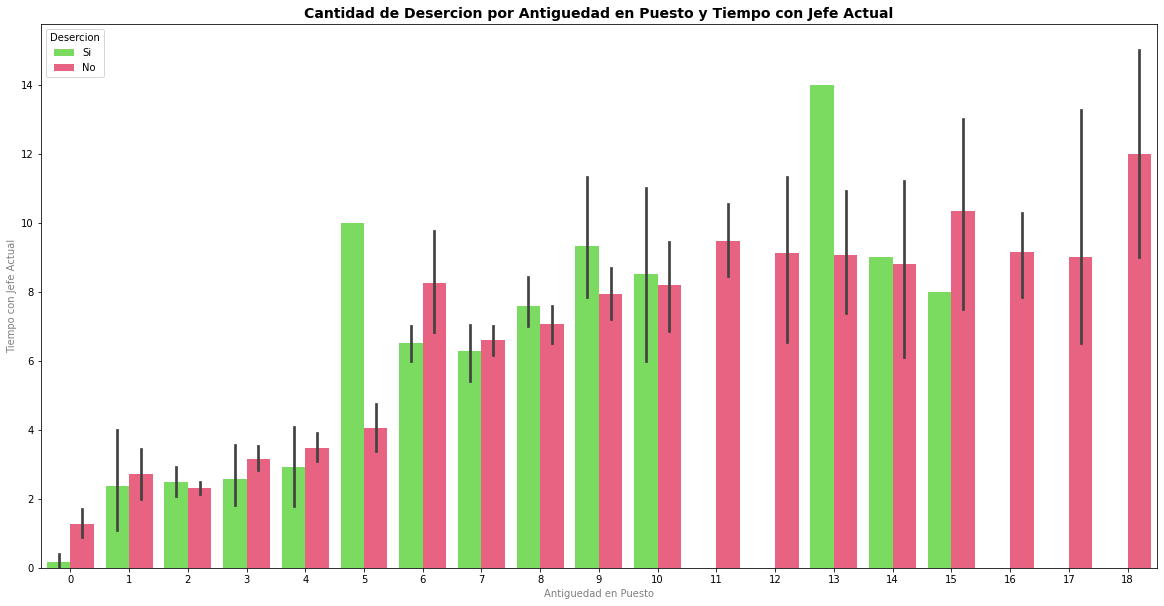

In [34]:
#Antiguedad v Jefe v Desercion
fig,axes = plt.subplots(figsize = (20,10))
ax = sns.barplot(x='Antiguedad_Puesto',y='Tiempo_Jefe_Actual',hue='Desercion', data=df,palette='prism', alpha=0.7)
ax.set(title="Cantidad de Desercion por Antiguedad en Puesto y Tiempo con Jefe Actual", xlabel="Antiguedad en Puesto", ylabel="Tiempo con Jefe Actual")
plt.show()

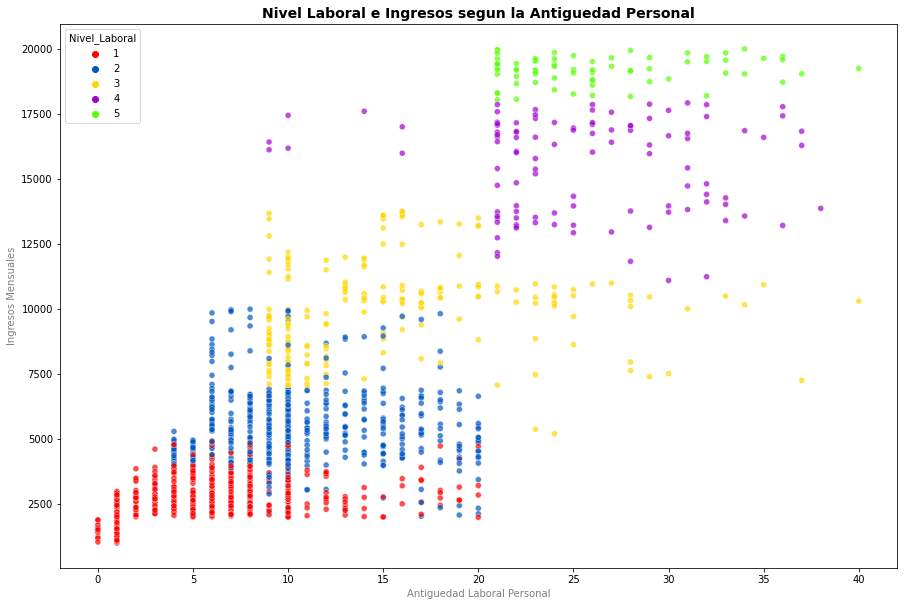

In [35]:
#Nivel, Antiguedad, Ingresos Mensuales
fig,axes = plt.subplots(figsize = (15,10))
ax = sns.scatterplot(x='Antiguedad_Laboral_Personal',y='Ingresos_Mensuales',hue='Nivel_Laboral', data=df,palette='prism', alpha=0.7)
ax.set(title="Nivel Laboral e Ingresos segun la Antiguedad Personal", xlabel="Antiguedad Laboral Personal", ylabel="Ingresos Mensuales")
plt.show()

#### **Conclusiones:**

* A medida que la edad avanza, se incrementa salario mensual. Indicando que la antiguedad y experiencia generan ingresos mayores. En cuanto a deserción, las personas menores a 40 tienen una mayor tendencia a dejar la empresa.
* En cuanto al nivel laboral dentro de la empresa, a mayor nivel menor deserción; por lo cual las personas que no tienen crecimiento profesional se ven mas propensas a renunciar.
* Sin embargo, vemos que mientras mas antiguedad tenga el empleado en el puesto, mas tiempo trabaja con el mismo jefe. Esta poca rotatividad genera un incremento considerable en la deserción. Habiendo casos en donde hubo mas personas renunciando que manteniendo el puesto. 
* Las personas que poseen una antiguedad laboral personal mayor (es decir, no solo dentro de la empresa) poseen un nivel laboral y un salario mayor a que las personas con poca experiencia. Podemos ver que aquellas personas que han trabajado por mas de 20 años acaparan los niveles y los salarios mas altos.

## **Modelos Predictivos**

In [36]:
from sklearn.model_selection import train_test_split #separar en train y test
from sklearn.metrics import accuracy_score           #calcular la metrica accuracy

### **¿Por qué Random Forest sería el mejor algoritmo para nuestro modelo?**
Como fue indicado al principio, el objetivo del modelo es conocer las principales causas de deserción. Por la naturaleza del dataset, necesitamos aplicar un algoritmo de clasificación; siendo la variable target "Deserción".

El dataset posee una mezcla de caracteristas categoricas y numericas. Como por ejemplo, si tiene viaje laborales, qué tal lejos vive del trabajo, cuanta antiguedad posee, la edad, el nivel educativo, la tarifa diaria, etc.

El algoritmo de Random Forest hace que cada árbol se entrene con distintas muestras de datos para un mismo problema. Por ende, al combinar sus resultados, unos errores se compensan con otros y tenemos una predicción mas generalizada.
Es por esto, que consideramos que el mejor algoritmo para nuestra problematica es el Random Forest. 

Un Random Forest es un conjunto de árboles de decisión combinados.
En el algoritmo de arbol de decision, un solo arbol ve todos los datos de entrenamiento y tiende a aprenderlos muy bien pero su generalización no es tan buena. De hecho, suelen tener tendencia a generar over-fitting.

Sin embargo, veamos como algunos algoritmos reaccionan a nuestro dataset y si realmente el Random Forest tendrá el mayor numero de predicciones correctas.

### **Preparación del dataset para usar en los modelos**



---


Para poder trabajar con el dataset, necesitamos convertir las variables categoricas en variables indicadoras. 

Para hacer esto, se utiliza el método **pd.get_dummies()** , cuya función es generar un DataFrame con nombres de columnas ficticias formado por la concatenación del nombre de la columna original y cada valor único de la columna.

---

In [37]:
df_dummy = pd.get_dummies(df, drop_first=True)
df_dummy.head()

,Edad,Tarifa_Diaria,Distancia_Casa,Educacion,Cantidad_Empleados,ID_Empleado,Satisfaccion_Ambiente,Tarifa_Hora,Participacion_Laboral,Nivel_Laboral,Satisfaccion_Laboral,Ingresos_Mensuales,Tarifa_Mensual,Cant_Empresas_Trabajadas,Aumento_Salario_Porcentual,Clasificacion_Rendimiento,Satisfaccion_Relacion,Horas_Habituales,Nivel_Opciones_Acciones,Antiguedad_Laboral_Personal,Cantidad_Capacitaciones_Anuales,Equilibrio_Laboral_Personal,Antiguedad_Compania,Antiguedad_Puesto,Tiempo_Ultimo_Ascenso,Tiempo_Jefe_Actual,Desercion_Si,Viajes_Laborales_Nunca,Viajes_Laborales_Raramente,Departamento_Recursos Humanos,Departamento_Ventas,Carrera_Marketing,Carrera_Medicina,Carrera_Otros,Carrera_Posgrado Tecnico,Carrera_Recursos Humanos,Genero_Masculino,Puesto_Director de Manufactura,Puesto_Ejecutivo de Ventas,Puesto_Gerente,Puesto_Investigador Cientifico,Puesto_Recursos Humanos,Puesto_Representante de Atencion Medica,Puesto_Representante de Ventas,Puesto_Tecnico de Laboratorio,Estado_Civil_Divorciado,Estado_Civil_Soltero,Horas_Extra_Si
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [38]:
#Separamos el dataset en X e Y
X = df_dummy.drop("Desercion_Si", axis=1) #Elimino de mi dataset la variable a predecir
Y = df_dummy.Desercion_Si                 #Defino la variable target del modelo

In [39]:
df.head()

,Edad,Desercion,Viajes_Laborales,Tarifa_Diaria,Departamento,Distancia_Casa,Educacion,Carrera,Cantidad_Empleados,ID_Empleado,Satisfaccion_Ambiente,Genero,Tarifa_Hora,Participacion_Laboral,Nivel_Laboral,Puesto,Satisfaccion_Laboral,Estado_Civil,Ingresos_Mensuales,Tarifa_Mensual,Cant_Empresas_Trabajadas,Horas_Extra,Aumento_Salario_Porcentual,Clasificacion_Rendimiento,Satisfaccion_Relacion,Horas_Habituales,Nivel_Opciones_Acciones,Antiguedad_Laboral_Personal,Cantidad_Capacitaciones_Anuales,Equilibrio_Laboral_Personal,Antiguedad_Compania,Antiguedad_Puesto,Tiempo_Ultimo_Ascenso,Tiempo_Jefe_Actual
0,41,Si,Raramente,1102,Ventas,1,2,Ciencias Naturales,1,1,2,Femenino,94,3,2,Ejecutivo de Ventas,4,Soltero,5993,19479,8,Si,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Frecuentemente,279,Investigacion y Desarrollo,8,1,Ciencias Naturales,1,2,3,Masculino,61,2,2,Investigador Cientifico,2,Casado,5130,24907,1,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Si,Raramente,1373,Investigacion y Desarrollo,2,2,Otros,1,4,4,Masculino,92,2,1,Tecnico de Laboratorio,3,Soltero,2090,2396,6,Si,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Frecuentemente,1392,Investigacion y Desarrollo,3,4,Ciencias Naturales,1,5,4,Femenino,56,3,1,Investigador Cientifico,3,Casado,2909,23159,1,Si,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Raramente,591,Investigacion y Desarrollo,2,1,Medicina,1,7,1,Masculino,40,3,1,Tecnico de Laboratorio,2,Casado,3468,16632,9,No,12,3,4,80,1,6,3,3,2,2,2,2


In [40]:
#Se define que sera 30% para test y 70% para train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

### **Arbol de Decisión**

El **Arbol de Decisión** tiene este nombre ya que justamente toma una serie de decisiones en forma de árbol, donde los nodos intermedios (las ramas) representan soluciones. Los nodos finales (las hojas) nos dan la predicción que vamos buscando.


**Hiperparametros:**

**max_depth=1**. Este hiperparametro indica que tan profundo queremos que el arbol crezca. Mientras mayor sea el numero, mayor profundidad tendrá, y mas complejo se volverá el modelo. El inconveniente es que si le indicamos un número muy alto, tendrá tendencia a aprender "demasiado bien" el dataset y generar overfitting.

**random_state=40**. Este hiperparametro controla la aleatoriedad de donde aparecen las ramas, y de donde se "cortan" las ramas generando ramas adicionales.

In [41]:
#importa el modelo de Arbol de Decision
from sklearn.tree import DecisionTreeClassifier      

In [42]:
#Crea el modelo de Arbol de Decision
dt_df = DecisionTreeClassifier(max_depth=1, random_state=40) 

#Entrena el modelo
dt_df.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=1, random_state=40)

In [43]:
#Realiza precciones
Y_train_pred = dt_df.predict(X_train) #en Train
prediccionArbolDecision = dt_df.predict(X_test)   #en Test

In [44]:
#Metrica accuracy
dt_train_accuracy = accuracy_score(Y_train, Y_train_pred) #Accuracy en Train
dt_test_accuracy = accuracy_score(Y_test, prediccionArbolDecision)    #Accuracy en Test

#Devuelve por mensaje de consola los resultados obtenidos
print('% de aciertos sobre el set de entrenamiento:', dt_train_accuracy)
print('% de aciertos sobre el set de evaluación:',dt_test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.8289601554907677
% de aciertos sobre el set de evaluación: 0.8616780045351474


### **Random Forest**

Como se indicó anteriormente, un Random Forest es un conjunto de árboles de decisión combinados. 


**Hiperparametros:**


**random_state=11**: Controla la aletoriedad del arranque de las muestras utilizadas al construir árboles, y donde estará la división de cada nodo.


**n_estimators=200**: La cantidad de arboles que va a tener el bosque. Normalmente cuantos más mejor, pero a partir de cierto punto deja de mejorar y sólo hace que vaya más lento. Notamos que entre 180-200 era un numero optimo para nuestro dataset.


**class_weight="balanced"**: Se eligió que el peso de las clases sea balanceado. Es decir, las clases tendrán un peso inversamente proporcional a la frecuencia con la que aparecen en los datos.

In [45]:
#importa la libreria
from sklearn.ensemble import RandomForestClassifier

In [46]:
#Crea el modelo de Random Forest
rf_df = RandomForestClassifier(random_state=11, n_estimators=200, class_weight="balanced")

#Entrena el Modelo
rf_df.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=11)

In [47]:
#Realiza predicciones en test
prediccionRandomForest = rf_df.predict(X_test)

In [48]:
#Calculo el accuracy en Test
rf_test_accuracy = accuracy_score(Y_test, prediccionRandomForest)

print('% de aciertos sobre el set de evaluación:',rf_test_accuracy)

% de aciertos sobre el set de evaluación: 0.8707482993197279


### **Regresión Logística**

A menudo, se habla de la **Regresión Logística** como "una red neuronal en miniatura". Esto es porque al principio de la neurona, se hace un combinación lineal que se parece mucho a una regresión lineal *(dato curioso)*.

La Regresión Logista se caracteriza por usar una función Logística llamada **"función Sigmoide"**. Simplificadamente podríamos decir que describe y estima la relación entre una variable binaria dependiente y las variables independientes.

En nuestro caso, no consideramos asignarle hiperparametros al algoritmo.

In [49]:
#importa la libreria
from sklearn.linear_model import LogisticRegression

In [50]:
#Crea el modelo de Regresion logica
lr_df = LogisticRegression()

#Entrena el Modelo
lr_df.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [51]:
#Realiza predicciones en test
prediccionRegresionLogistica = lr_df.predict(X_test)

In [52]:
#Calculo el accuracy en Test
lr_test_accuracy = accuracy_score(Y_test, prediccionRegresionLogistica)

print('% de aciertos sobre el set de evaluación:',lr_test_accuracy)

% de aciertos sobre el set de evaluación: 0.8639455782312925


### **K-Nearest-Neighbor (KNN)**

El **KNN** sirve esencialmente para clasificar valores buscando los puntos de datos “más similares” (por cercanía) aprendidos en la etapa de entrenamiento. La K significa la cantidad de “puntos vecinos”.

**Hiperparametros:**

**n_neighbors=27**: Indica el numero de vecinos para usar por default. En el caso de nuestro dataset; a mayor el numero, mayor es la probabilidad de generar over fitting. Y si elegimos un numero muy pequeño, el accuracy del algoritmo baja drasticamente (underfitting).


 **algorithm="auto"**: Es el algoritmo utilizado para calcular los vecinos mas cercanos. En nuestro caso elegimos "auto"; es significa que intentara decidir el algoritmo mas apropiado basado en los valores pasados en el entrenamiento.


In [53]:
#importa la libreria
from sklearn.neighbors import KNeighborsClassifier

In [54]:
#Crea el modelo de KNN
knn_df = KNeighborsClassifier(n_neighbors=27,algorithm="auto")

#Entrena el Modelo
knn_df.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=27)

In [55]:
#Realiza predicciones en test
prediccionKNN = knn_df.predict(X_test)

In [56]:
#Calculo el accuracy en Test
knn_test_accuracy = accuracy_score(Y_test, prediccionKNN)

print('% de aciertos sobre el set de entrenamiento:', knn_test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.8616780045351474


### **Gráfico Comparativo**

In [57]:
#DataFrame comparativo
modelo = pd.Series(['Arbol de Decision','Random Forest','Regresion Logistica','KNN'])
resultadoTest = pd.Series([dt_test_accuracy,rf_test_accuracy,lr_test_accuracy,knn_test_accuracy])

performance = pd.DataFrame({'Modelo':modelo,'%_Acierto_Test':resultadoTest}).sort_values(by='%_Acierto_Test', ascending=False)
performance

,Modelo,%_Acierto_Test
1,Random Forest,0.870748
2,Regresion Logistica,0.863946
0,Arbol de Decision,0.861678
3,KNN,0.861678


(0.8, 0.9)

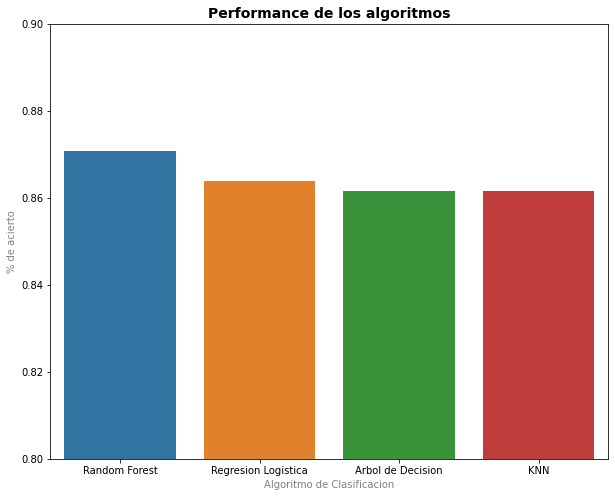

In [58]:
#Crea un grafico de barras con los porcentajes de acierto de cada modelo.
fig,axes = plt.subplots(figsize = (10,8))
ax = sns.barplot(data=performance, x='Modelo',y='%_Acierto_Test', order=performance.sort_values('%_Acierto_Test',ascending=False).Modelo)
ax.set(title='Performance de los algoritmos',xlabel='Algoritmo de Clasificacion',ylabel= '% de acierto')
plt.ylim([0.8,0.9])

### **Conclusión:**
Luego de comparar el porcentaje de acierto de cada uno de los algoritmos verificamos que, tal como pensabamos, el que mejor se adecúa a nuestro dataset es el **Random Forest.** Obtuvo un 0.87% de acierto en las predicciones; es decir, no generó ni under ni overfitting y superó al resto de los algoritmos en sus predicciones.



## **Mejoras a nuestro modelo predictivo**

### **Metricas Random Forest Original**

*En primer lugar, veremos qué métricas obtenemos con nuestro Random Forest Actual*

[[379   1]
 [ 56   5]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


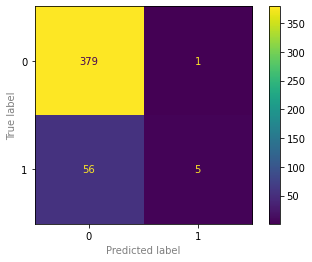

In [59]:
from sklearn.metrics import confusion_matrix      #trae un array con la matriz
from sklearn.metrics import plot_confusion_matrix #sirve para graficar la matriz

print(confusion_matrix(Y_test, prediccionRandomForest))

#grafico de la matriz
plot_confusion_matrix(rf_df, X_test, Y_test)
plt.show()

In [60]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

prec_score_1 = precision_score(Y_test, prediccionRandomForest)
reca_score_1 = recall_score(Y_test, prediccionRandomForest)
f1_score_1 = f1_score(Y_test, prediccionRandomForest)

print("La metrica de precision es:", prec_score_1)
print("La metrica de Recall es:", reca_score_1)
print("La metrica de F1 Score es:", f1_score_1)

La metrica de precision es: 0.8333333333333334
La metrica de Recall es: 0.08196721311475409
La metrica de F1 Score es: 0.14925373134328357


*Nuestra matriz de confusión nos indica que el modelo predijo correctamente que 379 empleados que desertarían, y 56 donde falsamente predijo que desertarían pero no lo hicieron.*

*Esto se traduce en las siguientes metricas; donde tuvo una precisión del 0,83% y un recall del 0,08%.*

el AUC del modelo es: 0.7644305435720449


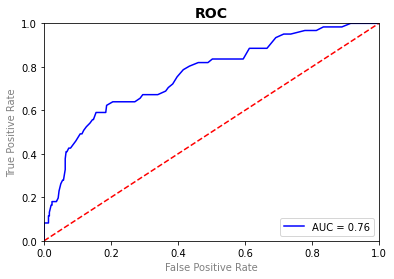

In [61]:
from sklearn.metrics import roc_curve, auc         

probs = rf_df.predict_proba(X_test)   
preds = probs[:, 1]                               
 
fpr, tpr, threshold = roc_curve(Y_test, preds)    
roc_auc = auc(fpr, tpr)                            

# AUC
print("el AUC del modelo es:", roc_auc)

# Gráfica de la Curva ROC
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)  #grafica el AUC
plt.legend(loc = 'lower right')                           #posiciona la etiqueta
plt.plot([0, 1], [0, 1],'r--')                            #grafica la linea de puntos
plt.xlim([0, 1])                                          #deja el grafico mas cerca de los bordes
plt.ylim([0, 1])                                          #deja el grafico mas cerca de los bordes
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



### **Creacion de un nuevo Random Forest**

*Ahora que ya tenemos nuestras métricas a comparar, realicemos unas cuantas mejoras a nuestro modelo:*

En primer lugar, cambiaremos el método mediante el cual adaptamos el dataset para que pueda ser aplicado a los algoritmos de predicción. Anteriormente usamos **pd.get_dummies**, esto modifica el dataset creando nuevas columnas y agregando mas registros.


Ahora realizaremos un método distinto, mas preciso, y mediante el cual tambien obtendremos nuestro X e Y.

Mediante un **for**, buscaremos todos los datos que sean tipo "**object**" y los reemplazaremos por datos numericos. De esta manera, no estamos agregando columnas ni registros; sino que estamos cambiando el texto por numero.

In [62]:
for n in df.columns:
  if str(df[n].dtype) == 'object' or str(df[n].dtype) == 'category':
    df[n] = df[n].astype('category').cat.codes
X_2 = df.drop(['Desercion'], axis=1).to_numpy()
Y_2 = df['Desercion'].to_numpy()
df.head()

,Edad,Desercion,Viajes_Laborales,Tarifa_Diaria,Departamento,Distancia_Casa,Educacion,Carrera,Cantidad_Empleados,ID_Empleado,Satisfaccion_Ambiente,Genero,Tarifa_Hora,Participacion_Laboral,Nivel_Laboral,Puesto,Satisfaccion_Laboral,Estado_Civil,Ingresos_Mensuales,Tarifa_Mensual,Cant_Empresas_Trabajadas,Horas_Extra,Aumento_Salario_Porcentual,Clasificacion_Rendimiento,Satisfaccion_Relacion,Horas_Habituales,Nivel_Opciones_Acciones,Antiguedad_Laboral_Personal,Cantidad_Capacitaciones_Anuales,Equilibrio_Laboral_Personal,Antiguedad_Compania,Antiguedad_Puesto,Tiempo_Ultimo_Ascenso,Tiempo_Jefe_Actual
0,41,1,2,1102,2,1,2,0,1,1,2,0,94,3,2,2,4,2,5993,19479,8,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,0,279,0,8,1,0,1,2,3,1,61,2,2,4,2,0,5130,24907,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,0,2,2,3,1,4,4,1,92,2,1,8,3,2,2090,2396,6,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,0,1392,0,3,4,0,1,5,4,0,56,3,1,4,3,0,2909,23159,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,0,2,1,2,1,7,1,1,40,3,1,8,2,0,3468,16632,9,0,12,3,4,80,1,6,3,3,2,2,2,2


*Continuaremos haciendo un **KFold** para nuestro modelo, y tambien entrenaremos nuestro nuevo Random Forest buscando los mejores parametros a traves de un **Grid Search CV**. Con estos métodos generaremos un modelo mucho mas robusto que el anterior.*

La validación cruzada **k-fold** significa que el conjunto de datos se divide en un número K. Divide el conjunto de datos en el punto en el que el conjunto de pruebas utiliza cada pliegue. 


Muy resumidamente, el modelo utiliza el primer pliegue en la primera iteración para probar el modelo; y utiliza los conjuntos de datos restantes para entrenar el modelo. 


Por otro lado, el **GridSearchCV** es una clase disponible en scikit-learn que permite evaluar y seleccionar de forma sistemática los parámetros de un modelo


In [63]:
#KFold
from sklearn.model_selection import KFold
KFold_df= KFold(n_splits=5, random_state=0, shuffle=True)
train_2, test_2 = list(KFold_df.split(X_2))[0]
X_train_2 = X_2[train_2]
X_test_2 = X_2[test_2]
Y_train_2 = Y_2[train_2]
Y_test_2 = Y_2[test_2]

In [64]:
#Entrenar arbol y encontrar el mejor alpha con GridSearchCV y KFold
from sklearn.model_selection import GridSearchCV

rf_df2 = RandomForestClassifier()
par_df2 = list(np.arange(0.0, 1., step=0.05))
cv_df2 = KFold(n_splits=5, random_state=0, shuffle=True)
tunner_df2 = GridSearchCV(estimator=rf_df2, param_grid={'ccp_alpha':par_df2}, cv=cv_df2)
_=tunner_df2.fit(X_train_2, Y_train_2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


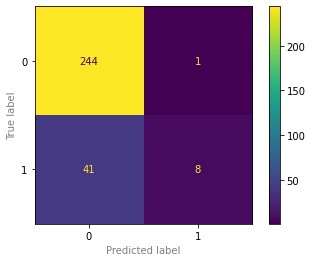

In [65]:
#grafico de la matriz
plot_confusion_matrix(tunner_df2, X_test_2, Y_test_2)
plt.show()

*En nuestra nueva matriz de confusión, obtenemos resultamos mas reales que en el anterior; ya que al no agregar registros, no agregamos cantidad de "empleados".*

*Actualmente nuestro nuevo modelo predijo correctamente que 244 empleados desertarían, y predijo falsamente que 41 empleados desertarían cuando en realidad no lo hicieron.*

In [66]:
#Metricas
print('Train score KFold: ' + str(tunner_df2.score(X_train_2, Y_train_2)))
print('Test score KFold: ' + str(tunner_df2.score(X_test_2, Y_test_2)))

Train score KFold: 1.0
Test score KFold: 0.8571428571428571


In [67]:
#Realiza predicciones en test
prediccionRandomForest2 = tunner_df2.predict(X_test_2)

In [68]:
#Nuevas Metricas
prec_score_2 = precision_score(Y_test_2, prediccionRandomForest2)
reca_score_2 = recall_score(Y_test_2, prediccionRandomForest2)
f1_score_2 = f1_score(Y_test_2, prediccionRandomForest2)

print("La metrica de precision es:", prec_score_2)
print("La metrica de Recall es:", reca_score_2)
print("La metrica de F1 Score es:", f1_score_2)

La metrica de precision es: 0.8888888888888888
La metrica de Recall es: 0.16326530612244897
La metrica de F1 Score es: 0.27586206896551724


el AUC del modelo es: 0.7540608079966682


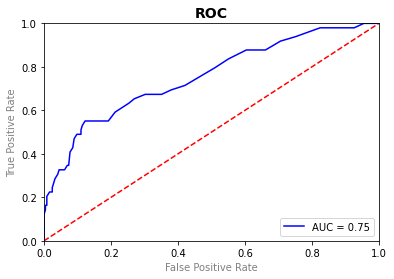

In [69]:
#obtenemos el nuevo AUC y lo graficamos
probs = tunner_df2.predict_proba(X_test_2)        
preds = probs[:, 1]                               
 
fpr, tpr, threshold = roc_curve(Y_test_2, preds)    
roc_auc2 = auc(fpr, tpr)                           

# AUC
print("el AUC del modelo es:", roc_auc2)

# Gráfica de la Curva ROC
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc2)  #grafica el AUC
plt.legend(loc = 'lower right')                           #posiciona la etiqueta
plt.plot([0, 1], [0, 1],'r--')                            #grafica la linea de puntos
plt.xlim([0, 1])                                          #deja el grafico mas cerca de los bordes
plt.ylim([0, 1])                                          #deja el grafico mas cerca de los bordes
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [70]:
#DataFrame comparativo
metricas = pd.Series(['Precision_Score','Recall','F1_Score'])
modelos = pd.Series(['Random_Forest_Orig','Random_Forest_Nuevo'])
res_preci = pd.Series([prec_score_1,prec_score_2])
res_reca = pd.Series([reca_score_1,reca_score_2])
res_f1 = pd.Series([f1_score_1,f1_score_2])

ResultadosMetricas = pd.DataFrame({'Modelos':modelos,'Precision':res_preci,'Recall':res_reca, 'F1_Score':res_f1})
ResultadosMetricas

,Modelos,Precision,Recall,F1_Score
0,Random_Forest_Orig,0.833333,0.081967,0.149254
1,Random_Forest_Nuevo,0.888889,0.163265,0.275862


[Text(0, 0.5, 'Precision'),
 Text(0.5, 0, 'Modelos'),
 Text(0.5, 1.0, 'Metrica Precision')]

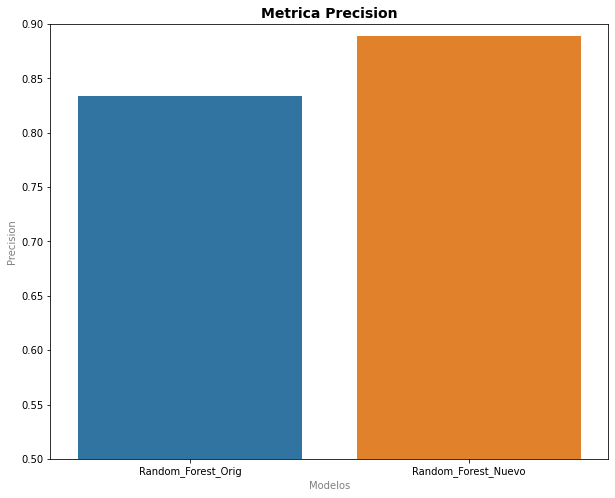

In [76]:
#Crea un grafico de barras con los porcentajes de acierto de cada modelo.
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=ResultadosMetricas, x='Modelos',y='Precision')
plt.ylim([0.5,0.9])
ax.set(xlabel="Modelos",ylabel="Precision",title='Metrica Precision')

[Text(0, 0.5, 'Recall'),
 Text(0.5, 0, 'Modelos'),
 Text(0.5, 1.0, 'Metrica Recall')]

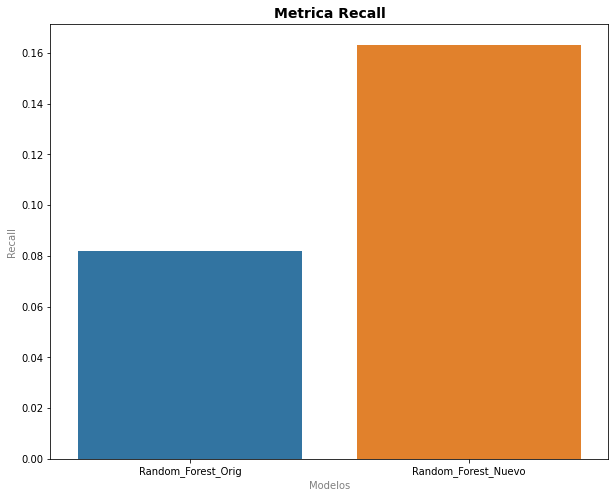

In [72]:
#Crea un grafico de barras con los porcentajes de acierto de cada modelo.
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=ResultadosMetricas, x='Modelos',y='Recall')
ax.set(xlabel="Modelos",ylabel="Recall",title='Metrica Recall')

[Text(0, 0.5, 'F1_Score'),
 Text(0.5, 0, 'Modelos'),
 Text(0.5, 1.0, 'Metrica F1_Score')]

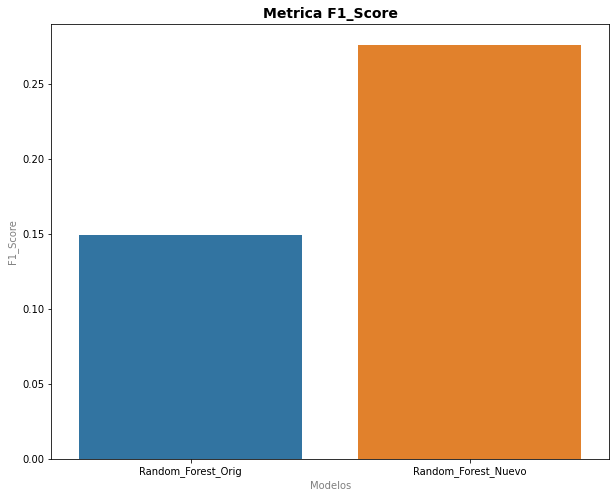

In [73]:
#Crea un grafico de barras con los porcentajes de acierto de cada modelo.
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=ResultadosMetricas, x='Modelos',y='F1_Score')
ax.set(xlabel="Modelos",ylabel="F1_Score",title='Metrica F1_Score')

### **Conclusion:**

Luego de generar nuestro modelo de manera mas optima, creamos un algoritmo mas robusto y con mejores resultados.

El mismo obtuvo un mejor acurracy,casi el doble de porcentaje de recall; es decir,  la cantidad que el modelo de machine learning es capaz de identificar.

Esto se ve representado en el F1 Score donde tambien la métrica aumentó  casi al doble.